# ACA 4: networking analysis
## AUTHOR: Honglin Zheng, Robert Abrams, Christine Gao, Mina Choi

## Abstract
The project presents geographic facts about states in the US. First I collected data of bordering states and the distance between capital cities. Then I calculated the density and centrality of each nodes. Last, I applied greedy modularity maximization analysis to detect community. As a result, all states were divided into 7 communities. The result was discussed.

# 1. clean data
 ******

### 1.1 collect data of states
*0s mean the states are not adjacent to each other;*

*Numbers other than 0 represent the distance between capital cities of two bordering states. The unit is 0.001 miles.*

In [261]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
MAPdata = pd.read_csv("states.csv", index_col = 0)
G = nx.Graph(MAPdata)

In [263]:
MAPdata

,WA,OR,CA,AK,HI,MT,ID,NV,AZ,WY,...,FL,ME,VT,NH,MA,CT,RI,NJ,DE,MD
WA,0.000,0.170,0.000,0,0,0.000,0.536,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
OR,0.170,0.000,0.534,0,0,0.000,0.449,0.516,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CA,0.000,0.534,0.000,0,0,0.000,0.000,0.130,0.755,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AK,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HI,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MT,0.000,0.000,0.000,0,0,0.000,0.487,0.000,0.000,0.692,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ID,0.536,0.449,0.000,0,0,0.487,0.000,0.450,0.000,0.735,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
NV,0.000,0.516,0.130,0,0,0.000,0.450,0.000,0.732,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AZ,0.000,0.000,0.755,0,0,0.000,0.000,0.732,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
WY,0.000,0.000,0.000,0,0,0.692,0.735,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


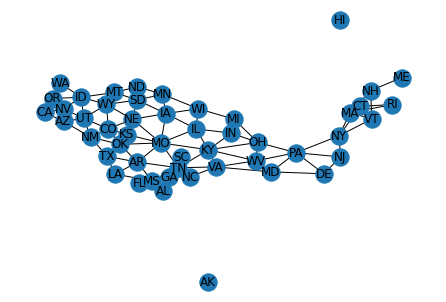

In [373]:
np.random.seed(1336556)
nx.draw(G, with_labels = True)

# 2. data analysis
 ******

In [388]:
density = nx.density(G)

print('The edge density is: %.3f' % (density))

The edge density is: 0.087


In [375]:
degree = nx.degree(G)
pd.DataFrame(degree)

,0,1
0,WA,2
1,OR,4
2,CA,3
3,AK,0
4,HI,0
5,MT,4
6,ID,6
7,NV,5
8,AZ,4
9,WY,6


In [376]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
WA,0.181781
OR,0.184007
CA,0.181051
AK,0.000000
HI,0.000000
MT,0.219910
ID,0.220988
NV,0.191024
AZ,0.213657
WY,0.260587


In [377]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
WA,0.000000
OR,0.004513
CA,0.001689
AK,0.000000
HI,0.000000
MT,0.017166
ID,0.083024
NV,0.009935
AZ,0.036807
WY,0.111094


In [378]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

lt = list(greedy_modularity_communities(G))

print(len(lt))

7


In [379]:
#Lets see these 7 clusters
community_0 = sorted(lt[0])
community_1 = sorted(lt[1])
community_2 = sorted(lt[2])
community_3 = sorted(lt[3])
community_4 = sorted(lt[4])
community_5 = sorted(lt[5])
community_6 = sorted(lt[6])

print(community_0)
print(community_1)
print(community_2)
print(community_3)
print(community_4)
print(community_5)
print(community_6)

['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
['DE', 'IL', 'IN', 'KY', 'MD', 'MI', 'NJ', 'OH', 'PA', 'WI', 'WV']
['AL', 'AR', 'FL', 'GA', 'LA', 'MS', 'NC', 'SC', 'TN', 'TX', 'VA']
['IA', 'KS', 'MN', 'MO', 'ND', 'NE', 'OK', 'SD']
['CT', 'MA', 'ME', 'NH', 'NY', 'RI', 'VT']
['AK']
['HI']


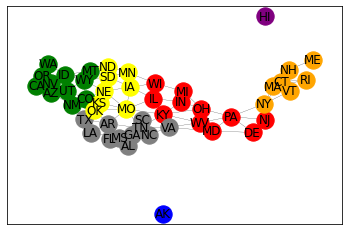

In [381]:

np.random.seed(1336556)


pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='grey', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_3, node_color='yellow', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_4, node_color='orange', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_5, node_color='blue', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_6, node_color='purple', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

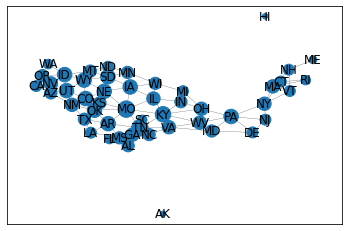

In [385]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [(v+1) * 30 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

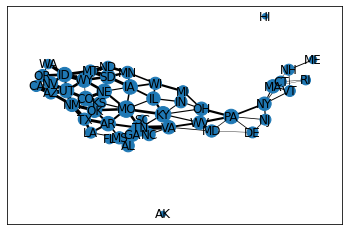

In [386]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [(v+1) * 30 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [6*e for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

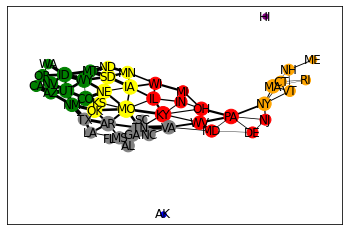

In [387]:
# Degrees of each community
community_0_degree = {lt: dict(degree)[lt] for lt in community_0}
community_1_degree = {lt: dict(degree)[lt] for lt in community_1}
community_2_degree = {lt: dict(degree)[lt] for lt in community_2}
community_3_degree = {lt: dict(degree)[lt] for lt in community_3}
community_4_degree = {lt: dict(degree)[lt] for lt in community_4}
community_5_degree = {lt: dict(degree)[lt] for lt in community_5}
community_6_degree = {lt: dict(degree)[lt] for lt in community_6}

# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [(v+1) * 30 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [(v+1) * 30 for v in community_1_degree.values()],
                       node_color='red', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_2,
                       node_size = [(v+1) * 30 for v in community_2_degree.values()],
                       node_color='grey', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_3,
                       node_size = [(v+1) * 30 for v in community_3_degree.values()],
                       node_color='yellow', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_4,
                       node_size = [(v+1) * 30 for v in community_4_degree.values()],
                       node_color='orange', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_5,
                       node_size = [(v+1) * 30 for v in community_5_degree.values()],
                       node_color='blue', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_6,
                       node_size = [(v+1) * 30 for v in community_6_degree.values()],
                       node_color='purple', label = True)



# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [6*e for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

# 3. discussion
 ******

The 7-cluster model is very meaningful. Green circle includes large western states. Grey circle includes southern states. Orange circle includes small eastnorthern states. Yellow circle includes central states that have more neighbors. Red circle includes central states that have fewer neighbors. In the end, Hawaii and Alaska respectively belong to purple and blue circles.

![realmap.jpeg](realmap.jpeg)

### Contribution
- data collection: Honglin
- code in Python: Honglin
- discussion writing: Honglin

In [392]:
import os

os.system('jupyter nbconvert --to html ACA4.ipynb')

[NbConvertApp] Converting notebook ACA4.ipynb to html
[NbConvertApp] Writing 818775 bytes to ACA4.html


0